In [31]:
import numpy as np
import pandas as pd

import glob
import os
import matplotlib.pyplot as plt


In [32]:

all_files = glob.glob("./TestResults/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [14]:
frame

,TestResult.DisplayName,TestResult.Outcome,TestResult.Duration,TestResult.ResourceCount
0,evaluator.evalRecordExprLemma (correctness),Passed,00:00:00.5312272,2404392
7,invertRecordTckRaw (correctness),Passed,00:00:01.2155696,2405366
8,recordExprIsSafe (correctness),Passed,00:00:00.5859436,963558
9,invertRecordCheck (correctness),Passed,00:00:00.4563932,415591
10,soundInversionSemantic (correctness),Passed,00:00:00.4292177,1011608
11,invertIfCheck (correctness),Passed,00:00:00.4195981,362608
14,invertOrCheck (correctness),Passed,00:00:00.3608570,290959
16,invertEqCheck (correctness),Passed,00:00:00.3472446,273692
17,invertAndCheck (correctness),Passed,00:00:00.3220408,305943
19,invertVarCheck (correctness),Passed,00:00:00.3100310,219599


In [17]:
def timedelta_to_microseconds(delta):
    return delta.days * 24 * 3600 * 1e6 + delta.seconds * 1e6 + delta.microseconds

In [33]:
#Filter for only correctness
frame = frame[frame['TestResult.DisplayName'].str.contains('\(correctness\)')]


directFrame = frame[frame['TestResult.DisplayName'].str.contains('soundDirect')]
monadicFrame = frame[frame['TestResult.DisplayName'].str.contains('soundMonadic')]
bidirFrame = frame[frame['TestResult.DisplayName'].str.contains('soundBidir')]
semanticFrame = frame[frame['TestResult.DisplayName'].str.contains('soundSemantic')]
inversionSemanticFrame = frame[frame['TestResult.DisplayName'].str.contains('soundInversionSemantic')]

directFrame['TestResult.Duration'] = pd.to_timedelta(directFrame['TestResult.Duration']).apply(timedelta_to_microseconds)
monadicFrame['TestResult.Duration'] = pd.to_timedelta(monadicFrame['TestResult.Duration']).apply(timedelta_to_microseconds)
bidirFrame['TestResult.Duration'] = pd.to_timedelta(bidirFrame['TestResult.Duration']).apply(timedelta_to_microseconds)
semanticFrame['TestResult.Duration'] = pd.to_timedelta(semanticFrame['TestResult.Duration']).apply(timedelta_to_microseconds)
inversionSemanticFrame['TestResult.Duration'] = pd.to_timedelta(inversionSemanticFrame['TestResult.Duration']).apply(timedelta_to_microseconds)

/var/folders/rj/yzfg8y3s62x51yphd1_qtjxm0000gq/T/ipykernel_66455/2679649024.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  directFrame['TestResult.Duration'] = pd.to_timedelta(directFrame['TestResult.Duration']).apply(timedelta_to_microseconds)
/var/folders/rj/yzfg8y3s62x51yphd1_qtjxm0000gq/T/ipykernel_66455/2679649024.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monadicFrame['TestResult.Duration'] = pd.to_timedelta(monadicFrame['TestResult.Duration']).apply(timedelta_to_microseconds)
/var/fol

1291618.58
67259.24581980213


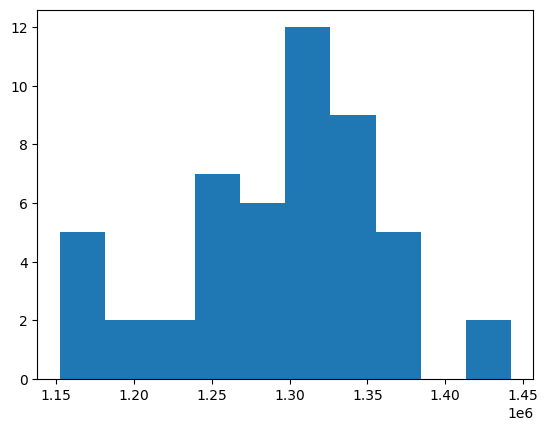

In [35]:
# plt.hist(directFrame['TestResult.Duration'])
# print(directFrame['TestResult.Duration'].mean()) 
# print(directFrame['TestResult.Duration'].std())

plt.hist(directFrame['TestResult.ResourceCount'])
print(directFrame['TestResult.ResourceCount'].mean()) 
print(directFrame['TestResult.ResourceCount'].std())



1400415.46
116029.5762541726


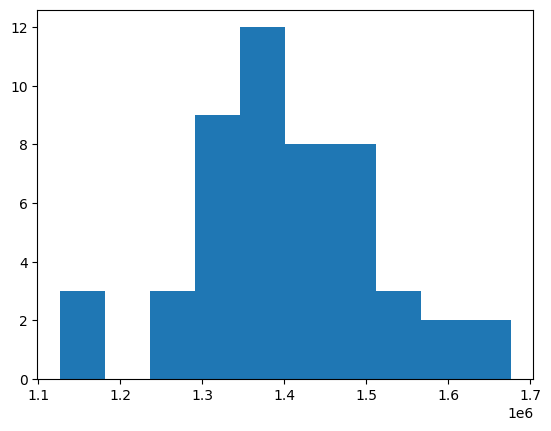

In [25]:
# plt.hist(monadicFrame['TestResult.Duration'])
# print(monadicFrame['TestResult.Duration'].mean())
# print(monadicFrame['TestResult.Duration'].std())

plt.hist(monadicFrame['TestResult.ResourceCount'])
print(monadicFrame['TestResult.ResourceCount'].mean()) 
print(monadicFrame['TestResult.ResourceCount'].std())

1603705.56
58548.729631614704


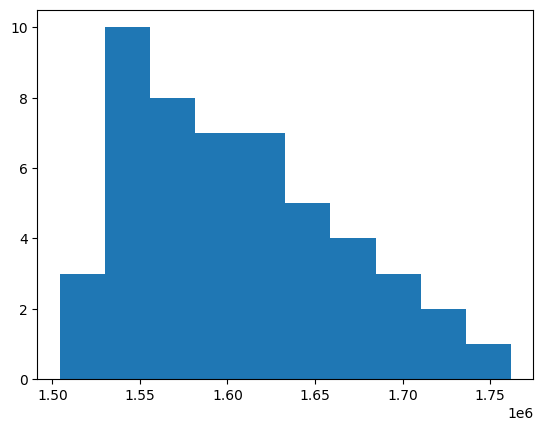

In [30]:
# plt.hist(bidirFrame['TestResult.Duration'])
# print(bidirFrame['TestResult.Duration'].mean())
# print(bidirFrame['TestResult.Duration'].std())

plt.hist(bidirFrame['TestResult.ResourceCount'])
print(bidirFrame['TestResult.ResourceCount'].mean()) 
print(bidirFrame['TestResult.ResourceCount'].std())

1256401.56
217184.81121857333


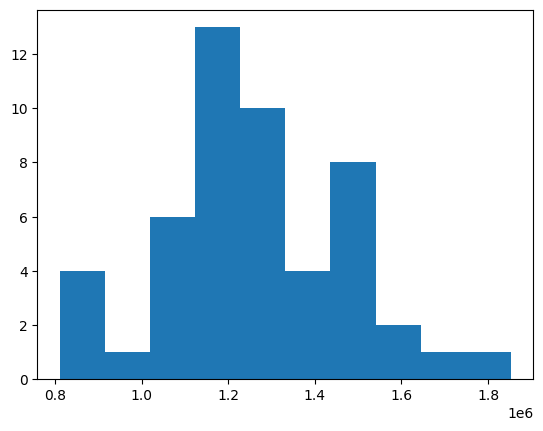

In [28]:
# plt.hist(semanticFrame['TestResult.Duration'])
# print(semanticFrame['TestResult.Duration'].mean())
# print(semanticFrame['TestResult.Duration'].std())

plt.hist(semanticFrame['TestResult.ResourceCount'])
print(semanticFrame['TestResult.ResourceCount'].mean()) 
print(semanticFrame['TestResult.ResourceCount'].std())

836691.42
141530.407699387


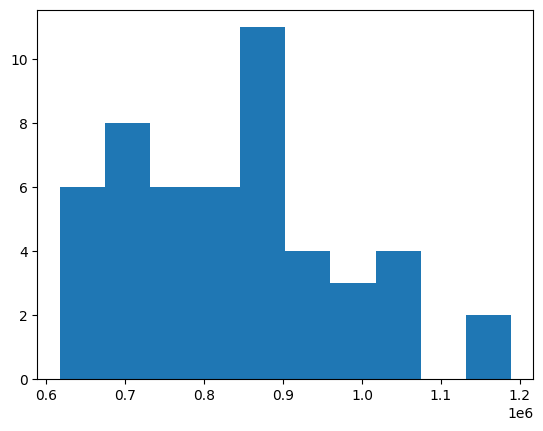

In [29]:
# plt.hist(inversionSemanticFrame['TestResult.Duration'])
# print(inversionSemanticFrame['TestResult.Duration'].mean())
# print(inversionSemanticFrame['TestResult.Duration'].std())

plt.hist(inversionSemanticFrame['TestResult.ResourceCount'])
print(inversionSemanticFrame['TestResult.ResourceCount'].mean()) 
print(inversionSemanticFrame['TestResult.ResourceCount'].std())